In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.patches as  mpatches
from matplotlib.lines import Line2D
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

/opt/homebrew/Caskroom/miniconda/base/envs/subhalos/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
plt.style.use('../../notebooks/paper/paper.mplstyle')
double_textwidth = 7.1 #inches
single_textwidth = 3.5 #inches

In [4]:
fixed = [False, True, False, False, True, False]
fid_values = [2.0, 0.2]


In [10]:
mock_1_100 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_1/Nhost_100/chain.h5", fixed=fixed, Nburn=40000, Nthin=15)
mock_1_1000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_1/Nhost_1000/chain.h5", fixed=fixed, Nburn=2500, Nthin=15)
mock_1_10000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_1/Nhost_10000/chain.h5", fixed=fixed, Nburn=1000, Nthin=15)

In [11]:
mock_2_100 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_2/Nhost_100/chain.h5", fixed=fixed, Nburn=40000, Nthin=15)
mock_2_1000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_2/Nhost_1000/chain.h5", fixed=fixed, Nburn=2500, Nthin=15)
mock_2_10000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_2/Nhost_10000/chain.h5", fixed=fixed, Nburn=1000, Nthin=15)

In [12]:
mock_3_100 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_3/Nhost_100/chain.h5", fixed=fixed, Nburn=20000, Nthin=15)
mock_3_1000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_3/Nhost_1000/chain.h5", fixed=fixed, Nburn=2500, Nthin=15)
mock_3_10000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_3/Nhost_10000/chain.h5", fixed=fixed, Nburn=1000, Nthin=15)

In [13]:
labels = ["$\hat{N}_{\mathrm{host}} = 10^4$", "$\hat{N}_{\mathrm{host}} = 10^4$", "$\hat{N}_{\mathrm{host}} = 10^4$",
          "$\hat{N}_{\mathrm{host}} = 10^3$", "$\hat{N}_{\mathrm{host}} = 10^3$", "$\hat{N}_{\mathrm{host}} = 10^3$", 
          "$\hat{N}_{\mathrm{host}} = 10^2$", "$\hat{N}_{\mathrm{host}} = 10^2$", "$\hat{N}_{\mathrm{host}} = 10^2$"]

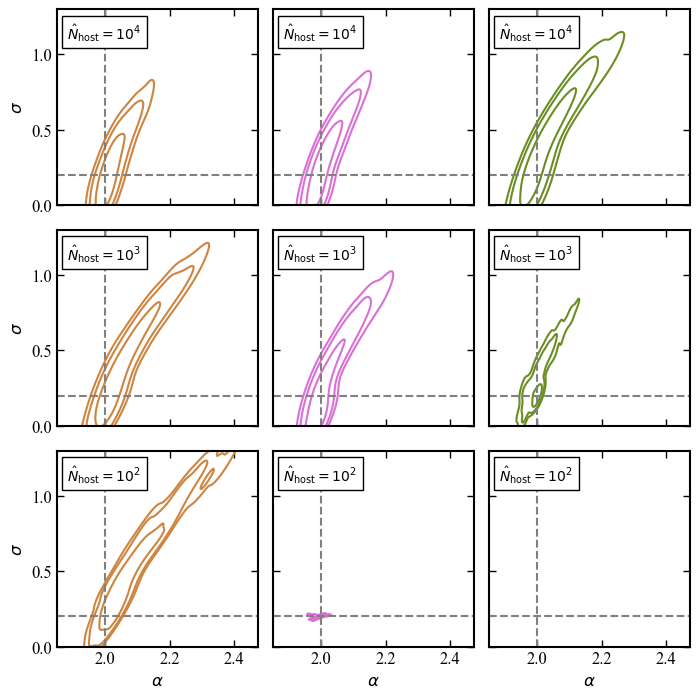

In [14]:
# Generate some random 2D data for demonstration
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(double_textwidth, double_textwidth))

#mock1 x 10000
sns.kdeplot(x=mock_1_10000.clean[:, 0], y=mock_1_10000.clean[:, 1], ax=axes[0,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="peru")
#mock1 x 1000
sns.kdeplot(x=mock_1_1000.clean[:, 0], y=mock_1_1000.clean[:, 1], ax=axes[1,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="peru")
#mock1 x 100
sns.kdeplot(x=mock_1_100.clean[:, 0], y=mock_1_100.clean[:, 1], ax=axes[2,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="peru")

#mock2 x 10000
sns.kdeplot(x=mock_2_10000.clean[:, 0], y=mock_2_10000.clean[:, 1], ax=axes[0,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")
#mock2 x 1000
sns.kdeplot(x=mock_2_1000.clean[:, 0], y=mock_2_1000.clean[:, 1], ax=axes[1,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")
#mock2 x 100
sns.kdeplot(x=mock_2_100.clean[:, 0], y=mock_2_100.clean[:, 1], ax=axes[2,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")

#mock_3 x 10000
sns.kdeplot(x=mock_3_10000.clean[:, 0], y=mock_3_10000.clean[:, 1], ax=axes[0,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="olivedrab")
#mock_3 x 1000
sns.kdeplot(x=mock_3_1000.clean[:, 0], y=mock_3_1000.clean[:, 1], ax=axes[1,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="olivedrab")
#mock_3 x 100
sns.kdeplot(x=mock_3_100.clean[:, 0], y=mock_3_100.clean[:, 1], ax=axes[2,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="olivedrab")

### LABELS
for index, ax in enumerate(axes.flatten()):
    ax.axhline(0.2, ls="--", color="grey")
    ax.axvline(2.0, ls="--", color="grey")
    ax.text(0.05, 0.85, labels[index], transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="k"))


axes[0,0].set_ylim(0, 1.3)
axes[0,0].set_ylabel("$\sigma$")
axes[1,0].set_ylabel("$\sigma$")
axes[2,0].set_ylabel("$\sigma$")

axes[2,0].set_xlabel("$\\alpha$")
axes[2,1].set_xlabel("$\\alpha$")
axes[2,2].set_xlabel("$\\alpha$")

# Adjust layout
plt.tight_layout()
#plt.savefig("../../../paper_1/figures/feature_recovery/matrix_update.pdf", bbox_inches="tight")
plt.show()
